# Modeling - Football Transfer Data Project

In this notebook, we will tackle our training and test sets created in the [previous notebook](http://localhost:8888/notebooks/Springboard/Springboard/Capstone%202/Capstone%202%20-%20Preprocessing%20and%20Training.ipynb) and try to run through a few models in an effort to create a best model for predicting market value.

We saved the split of data between training data (found in scaled_training.csv) and prediction data (found in prediciton.csv). Our training sets of data will be found in the scaled_training data set, which we will read in now, along with importing the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import preprocessing

df = pd.read_csv('scaled_training.csv')
df.head()

train_df = pd.read_csv("training.csv")

As we can see, our dataframe for testing has already been scaled in the previous notebook. We will now recreate our training and test data split, as we did before.

In [3]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['market_value'])
y = train_df['market_value']
# y_dis = train_df['market_value_est']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(54361, 25) (23298, 25)
(54361,) (23298,)


In [5]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

### Model Selection

For this notebook, we will be creating and evaluating 4 models in an effort to find the best one for predicting market value for players in European Football. We will explore the following:

* Random Forest
* Gradient Boosting
* K Means Neighbors
* Stochastic Gradient Descent

#### Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

# params = ['n_estimators'=800,
#  'min_samples_split'= 2,
#  'min_samples_leaf'= 1,
#  'max_features'= 'auto',
#  'max_depth'= 100,
#  'bootstrap'= True]


rf = RandomForestRegressor(n_estimators=800,
                         min_samples_split= 2,
                         min_samples_leaf= 1,
                         max_features= 'auto',
                         max_depth= 100,
                         bootstrap= True)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=800)

In [7]:
from sklearn import tree, metrics
y_pred_rf = pd.Series(rf.predict(X_test))

In [8]:
print(r2_score(y_pred_rf, y_test))

rf_r2 = r2_score(y_pred_rf, y_test)

0.7230886911969054


#### Gradient Boosting Machine

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=1234)

gb.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=1234)

In [10]:
y_pred_gb = gb.predict(X_test)

print(r2_score(y_pred_gb, y_test))

gb_r2 = r2_score(y_pred_gb, y_test)

0.6841349429975183


#### K Means Neighbors

In [11]:
from sklearn.neighbors import KNeighborsRegressor

test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


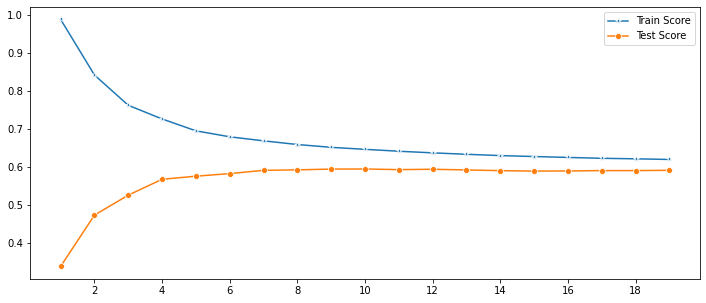

In [12]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')
plt.locator_params(nbins=10)

In [13]:
best_knn = KNeighborsRegressor(5)

best_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
y_pred_knn = best_knn.predict(X_test)
print(r2_score(y_pred_knn, y_test))

knn_r2 = r2_score(y_pred_knn, y_test)

0.3945291348891786


#### Stochastic Gradient Descent Regressor

In [15]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(loss='huber')

sgd.fit(X_train, y_train)

SGDRegressor(loss='huber')

In [16]:
y_pred_sgd = sgd.predict(X_test)

print(r2_score(y_pred_sgd, y_test))

sgd_r2 = r2_score(y_pred_sgd, y_test)

-0.05792590092569294


In [17]:
best_model_continuos = rf

We conclude that the Random Forest Model that we created would be the best model to move forward with in regards to predicting market values. It should be noted that the R2 scores were all low, meaning that there could be room for improvement with either more substantial data or better scaling/feature selection.

#### Model for Market Value based on range rather than exact value

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dis, test_size=0.3, random_state=42)

NameError: name 'y_dis' is not defined

In [ ]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

Because our data is more discrete that before, we expect there to be a difference in the predictability of models as the ranges are not as precise for the y values.

In [ ]:
rf2 = RandomForestRegressor()

rf2.fit(X_train, y_train)

rf2_r2 = r2_score(rf2.predict(X_test),y_test)

print(rf2_r2)

With no parameter tuning, we already have a better R2 score for the Random Forest. I suspect that if we find the best parameters, we will have a significantly better model, as well.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf_opt = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf_opt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [ ]:
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [ ]:
rf_random.best_params_

In [ ]:
rf_best = RandomForestRegressor(n_estimators=1400,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth=100
 ,bootstrap=True)

rf_best.fit(X_train, y_train)

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
# import os
# import pickle

# best_model_disc = rf_random.best_estimator_
# best_model_disc.version = 1.0
# best_model_disc.pandas_version = pd.__version__
# best_model_disc.numpy_version = np.__version__
# best_model_disc.sklearn_version = sklearn_version
# best_model_disc.X_columns = [col for col in X_train.columns]
# best_model_disc.build_datetime = datetime.datetime.now()
    
# modelpath = '../models'
# if not os.path.exists(modelpath):
#     os.mkdir(modelpath)
# disc_model_path = os.path.join(modelpath, 'disc_market_value_model.pkl')
# if not os.path.exists(disc_model_path):
#     with open(disc_model_path, 'wb') as f:
#         pickle.dump(best_model_disc, f)

In [ ]:
rf_disc_r2 = r2_score(rf_best.predict(X_test), y_test)

In [ ]:
rf_disc_r2

In [ ]:
best_model_disc = rf_best

#### Conclusions

We have below the results of the assessment of our 4 models for the continous market values: Random Forest Regressor, Gradient Boosting Regressor, K Means Neighbors Regression, and Stochastic Gradient Descent Regressor. We can see that the best model, given by the R2 score, would be the Random Forest, followed by the Gradient Boosting Regressor. The other two have much lower scores, and thus do not do a good job of predicting the market value for this data set.

We also placed the random forest model based on discrete values of market value (grouped by /$500,000 intervals). As we can see, the discrete Random Forest model has a slightly lower R2 score than the continuous Random Forest model.

In [ ]:
r2 = [['Random Forest Continuous',rf_r2],['Random Forest Discrete', rf_disc_r2],['Gradient Boost', gb_r2], ['K Means Regressor', knn_r2], ['Stochastic Gradient', sgd_r2]]

r2_df = pd.DataFrame(r2, columns=['Model', 'R2-Score'])

In [ ]:
r2_df

We will now test the model on our set of data that has null values for market value to see if either makes sense in regards to their predictions.

In [19]:
df_predict = pd.read_csv('prediction.csv')

df_predict.drop(columns='market_value', inplace=True)

df_predict.head()

,player_id,season,minutes_played,goal_contributions,minutes_per_appearance,height,fee,age,CB,CDM,...,RM,S,Asia,Europe,North_America,Other,South_America,Tier_2,Tier_3,Tier_4
0,1,2007,3789,21.0,84,188.0,0.0,24,0,0,...,0,1,0,0,1,0,0,0,0,1
1,1,2008,3283,35.0,80,188.0,0.0,25,0,0,...,0,1,0,0,1,0,0,0,0,1
2,1,2009,4184,39.0,82,188.0,0.0,26,0,0,...,0,1,0,0,1,0,0,0,0,1
3,1,2016,543,4.0,30,188.0,0.0,33,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1,2018,13,0.0,13,188.0,0.0,35,0,0,...,0,1,0,0,1,0,0,0,0,1


In [20]:
cont_pred = np.round(best_model_continuos.predict(df_predict),0)

cont_pred[:5]

array([1000584.,  764117.,  894835., 1634408., 1108160.])

In [ ]:
disc_pred = np.round(best_model_disc.predict(df_predict),0)

disc_pred[:5]

We can see, just from the first 5 entries that are produced by our two models, that there are slight differences in market value prediction. It also seems that the discrete model prediction may be consistently less than the continuous version. We will now explore the set of predictions based on just 2018 and verify which of the two models has the best predictions.

In [21]:
df_predict['continuous_value_prediction'] = cont_pred
# df_predict['discrete_value_prediction'] = disc_pred

df_predict.head()

,player_id,season,minutes_played,goal_contributions,minutes_per_appearance,height,fee,age,CB,CDM,...,S,Asia,Europe,North_America,Other,South_America,Tier_2,Tier_3,Tier_4,continuous_value_prediction
0,1,2007,3789,21.0,84,188.0,0.0,24,0,0,...,1,0,0,1,0,0,0,0,1,1000584.0
1,1,2008,3283,35.0,80,188.0,0.0,25,0,0,...,1,0,0,1,0,0,0,0,1,764117.0
2,1,2009,4184,39.0,82,188.0,0.0,26,0,0,...,1,0,0,1,0,0,0,0,1,894835.0
3,1,2016,543,4.0,30,188.0,0.0,33,0,0,...,1,0,0,1,0,0,0,0,1,1634408.0
4,1,2018,13,0.0,13,188.0,0.0,35,0,0,...,1,0,0,1,0,0,0,0,1,1108160.0


In [22]:
df_2018 = df_predict[df_predict['season'] == 2018]

df_2018.shape

(3602, 26)

##### Age analysis of model

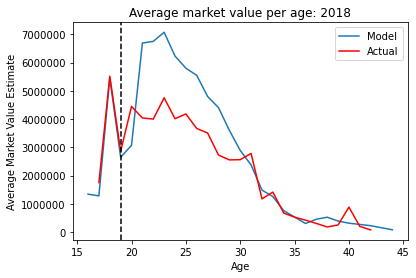

In [23]:
ax = plt.subplot()

ax.plot(df_2018.groupby('age')['continuous_value_prediction'].mean())
ax.plot(train_df[train_df['season']==2018].groupby('age')['market_value'].mean(), color='red')

ax.ticklabel_format(useOffset=False, style='plain')
plt.ylabel("Average Market Value Estimate")
plt.xlabel("Age")
plt.title("Average market value per age: 2018")
labels = ['Model', 'Actual']
plt.axvline(x=19, color='black', linestyle = '--')

plt.legend(labels)

plt.savefig('model_age_pred_2018.png')

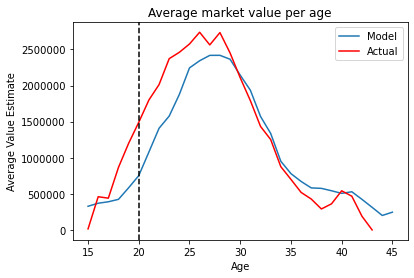

In [24]:
ax = plt.subplot()

ax.plot(df_predict.groupby('age')['continuous_value_prediction'].mean())
ax.plot(train_df.groupby('age')['market_value'].mean(), color='red')

ax.ticklabel_format(useOffset=False, style='plain')
plt.ylabel("Average Value Estimate")
plt.xlabel("Age")
plt.title("Average market value per age")
labels = ['Model', 'Actual']
plt.axvline(x=20, color='black', linestyle = '--')

plt.legend(labels)

plt.savefig('model_age_pred.png')

##### League analysis of model

In [25]:
df_tier_2 = df_predict[df_predict['Tier_2'] == 1]
df_tier_3 = df_predict[df_predict['Tier_3'] == 1]
df_tier_4 = df_predict[df_predict['Tier_4'] == 1]
df_tier_1 = df_predict[(df_predict['Tier_2'] + df_predict["Tier_3"] + df_predict['Tier_4']) == 0]

In [26]:
tier_1_mean = df_tier_1['continuous_value_prediction'].mean()
tier_2_mean = df_tier_2['continuous_value_prediction'].mean()
tier_3_mean = df_tier_3['continuous_value_prediction'].mean()
tier_4_mean = df_tier_4['continuous_value_prediction'].mean()

In [27]:
train_tier_2 = train_df[(train_df['Tier_2'] == 1)&(train_df['season']==2018)]
train_tier_3 = train_df[(train_df['Tier_3'] == 1)&(train_df['season']==2018)]
train_tier_4 = train_df[(train_df['Tier_4'] == 1)&(train_df['season']==2018)]
train_tier_1 = train_df[((train_df['Tier_2'] + train_df["Tier_3"] + train_df['Tier_4']) == 0)&(train_df['season']==2018)]

In [28]:
train_1_mean = train_tier_1['market_value'].mean()
train_2_mean = train_tier_2['market_value'].mean()
train_3_mean = train_tier_3['market_value'].mean()
train_4_mean = train_tier_4['market_value'].mean()

In [29]:
df_2018_2 = df_2018[df_2018['Tier_2'] == 1]['continuous_value_prediction'].mean()
df_2018_3 = df_2018[df_2018['Tier_3'] == 1]['continuous_value_prediction'].mean()
df_2018_4 = df_2018[df_2018['Tier_4'] == 1]['continuous_value_prediction'].mean()
df_2018_1 = df_2018[(df_2018['Tier_2'] + df_2018["Tier_3"] + df_2018['Tier_4']) == 0]['continuous_value_prediction'].mean()

In [30]:
l_2018 = [df_2018_1, df_2018_2, df_2018_3, df_2018_4]

In [31]:
means = [tier_1_mean, tier_2_mean, tier_3_mean, tier_4_mean]
labels = ['Tier_1', 'Tier_2', 'Tier_3', 'Tier_4']
lines = [train_1_mean, train_2_mean, train_3_mean, train_4_mean]


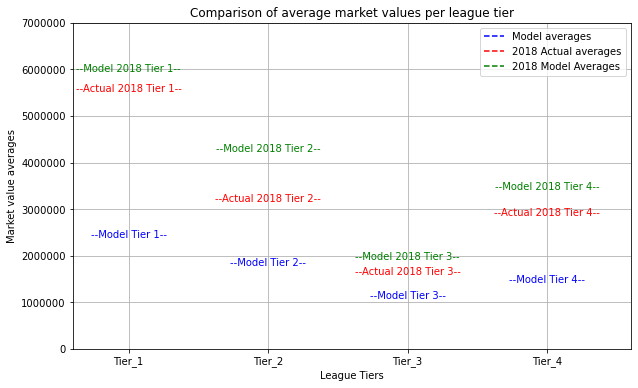

In [32]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.figure(figsize=(10,6))
ax = plt.subplot()
i = 1
for l in means:
    ax.text(0.5+(i-1),l,'--Model Tier '+str(int(i))+'--', color='blue', ha='center')
    i += 1.25

i = 1
for l in lines:
    ax.text(0.5+(i-1),l,'--Actual 2018 Tier '+str(int(i))+'--', color='red', ha='center')
    i += 1.25
plt.ylim(0,7000000)
plt.xlim(0,5)

i = 1
for l in l_2018:
    ax.text(0.5+(i-1),l,'--Model 2018 Tier '+str(int(i))+'--', color='green', ha='center')
    i += 1.25


legend_elements = [Line2D([0], [0], color='b', linestyle= 'dashed', label='Model averages'),
                   Line2D([0], [0], color='r', linestyle= 'dashed', label='2018 Actual averages'),
                  Line2D([0], [0], color='g', linestyle= 'dashed', label='2018 Model Averages')]
plt.legend(handles = legend_elements, loc='upper right')
x = np.array([0.5,1.75,3,4.25])
plt.xticks(x, labels)
plt.grid()
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Market value averages')
plt.title('Comparison of average market values per league tier')
plt.xlabel('League Tiers')
plt.savefig('tier_value.png')

##### Position analysis of model

In [33]:
df_predict.shape

(79637, 26)

In [34]:
df_pos = df_predict[['player_id', 'CB', 'CDM', 'CM',
       'GK', 'LB', 'LM', 'RB', 'RM', 'S']]
df_pos.head(3)

,player_id,CB,CDM,CM,GK,LB,LM,RB,RM,S
0,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1


In [35]:
df_pos['CAM'] = df_pos.drop('player_id',axis=1).sum(axis=1)
df_pos.head()

<ipython-input-35-af6e980af183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['CAM'] = df_pos.drop('player_id',axis=1).sum(axis=1)


,player_id,CB,CDM,CM,GK,LB,LM,RB,RM,S,CAM
0,1,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,0,0,1,1


In [36]:
df_pos.loc[:,('CAM')] = df_pos['CAM'].apply(lambda x: abs(x-1))

C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [37]:
df_pos.set_index('player_id',inplace=True)

df_pos = df_pos[df_pos==1].stack().reset_index().drop(0,1)

df_pos.columns

Index(['player_id', 'level_1'], dtype='object')

In [38]:
df_pos['level_1'].unique()

array(['S', 'CM', 'CB', 'GK', 'RM', 'LM', 'CDM', 'CAM', 'RB', 'LB'],
      dtype=object)

In [39]:
df_pos.rename(columns={'level_1':'position'}, inplace=True)

In [40]:
df_predict['position'] = df_pos['position']

In [41]:
df_predict.shape

(79637, 27)

In [42]:
train_pos = train_df[['player_id', 'CB', 'CDM', 'CM',
       'GK', 'LB', 'LM', 'RB', 'RM', 'S']]
train_pos['CAM'] = train_pos.drop('player_id',axis=1).sum(axis=1)
train_pos.loc[:,('CAM')] = train_pos['CAM'].apply(lambda x: abs(x-1))
train_pos.set_index('player_id',inplace=True)
train_pos = train_pos[train_pos==1].stack().reset_index().drop(0,1)
train_pos.rename(columns={'level_1':'position'}, inplace=True)

train_df['position'] = train_pos['position']

<ipython-input-42-1701ed802a11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pos['CAM'] = train_pos.drop('player_id',axis=1).sum(axis=1)


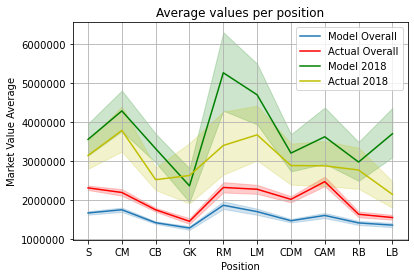

In [43]:
ax = plt.subplot()

sns.lineplot(x='position', y='continuous_value_prediction', data=df_predict)
sns.lineplot(x='position', y='market_value', data=train_df, color='r')
sns.lineplot(x='position', y='continuous_value_prediction', data=df_predict[df_predict['season']==2018], color='g')
sns.lineplot(x='position', y='market_value', data=train_df[train_df['season']==2018], color='y')
plt.legend(['Model Overall','Actual Overall', 'Model 2018', 'Actual 2018'])

plt.title('Average values per position')
plt.xlabel('Position')
plt.ylabel('Market Value Average')
plt.grid()
ax.ticklabel_format(axis='y', useOffset=False, style='plain')

plt.savefig('position_avg.png')

##### Region analysis of model

In [44]:
train_reg = train_df[['player_id', 'Asia', 'Europe',
       'North_America', 'Other', 'South_America']]
train_reg['Africa'] = train_reg.drop('player_id',axis=1).sum(axis=1)
train_reg.loc[:,('Africa')] = train_reg['Africa'].apply(lambda x: abs(x-1))
train_reg.set_index('player_id',inplace=True)
train_reg = train_reg[train_reg==1].stack().reset_index().drop(0,1)
train_reg.rename(columns={'level_1':'region'}, inplace=True)

train_df['region'] = train_reg['region']

<ipython-input-44-d409fdd2c189>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_reg['Africa'] = train_reg.drop('player_id',axis=1).sum(axis=1)
C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [45]:
train_df.shape

(77659, 28)

In [46]:
pred_reg = df_predict[['player_id', 'Asia', 'Europe',
       'North_America', 'Other', 'South_America']]
pred_reg['Africa'] = pred_reg.drop('player_id',axis=1).sum(axis=1)
pred_reg.loc[:,('Africa')] = pred_reg['Africa'].apply(lambda x: abs(x-1))
pred_reg.set_index('player_id',inplace=True)
pred_reg = pred_reg[pred_reg==1].stack().reset_index().drop(0,1)
pred_reg.rename(columns={'level_1':'region'}, inplace=True)

df_predict['region'] = pred_reg['region']

<ipython-input-46-ced93d716fb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_reg['Africa'] = pred_reg.drop('player_id',axis=1).sum(axis=1)


In [47]:
df_predict.shape

(79637, 28)

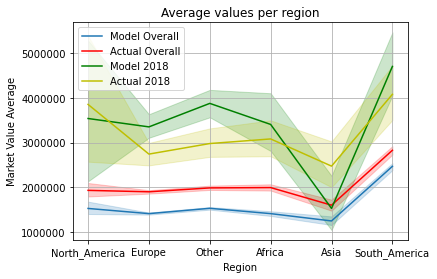

In [50]:
ax = plt.subplot()

sns.lineplot(x='region', y='continuous_value_prediction', data=df_predict)
sns.lineplot(x='region', y='market_value', data=train_df, color='r')
sns.lineplot(x='region', y='continuous_value_prediction', data=df_predict[df_predict['season']==2018], color='g')
sns.lineplot(x='region', y='market_value', data=train_df[train_df['season']==2018], color='y')
plt.legend(['Model Overall','Actual Overall', 'Model 2018', 'Actual 2018'])

plt.title('Average values per region')
plt.xlabel('Region')
plt.ylabel('Market Value Average')
plt.grid()
ax.ticklabel_format(axis='y', useOffset=False, style='plain')

plt.savefig('region_avg.png')